In [1]:
from nilearn import image as nli
from nilearn import plotting as nlp
%matplotlib inline
import numpy as np
import pandas as pd
import pickle

# Make a map of label names to masks

In [2]:
# Get FSL location
fsl_dir = !echo $FSLDIR
fsl_dir = fsl_dir[0]

In [3]:
# Load Talairach data
atlas_meta_path = fsl_dir +'/data/atlases/Talairach.xml'
atlas_image_path = fsl_dir +'/data/atlases/Talairach/Talairach-labels-2mm.nii.gz'
atlas_img = nli.load_img(atlas_image_path)
atlas_dat = atlas_img.get_data()

In [4]:
# Load metadata into dataframe
tt_dat = []
with open(atlas_meta_path, 'r') as h:
    for line in h:
        tt_dat.append(line) 
        
tt_dat = [ll.strip() for ll in tt_dat if '<label ' in ll]
regions = [ll.split('>')[1].split('<')[0].split('.') for ll in tt_dat]
values = [int(ll.split(('"'))[1]) for ll in tt_dat]

regions = [ll.split('>')[1].split('<')[0].split('.') for ll in tt_dat]
values = [int(ll.split(('"'))[1]) for ll in tt_dat]

tt_df = pd.DataFrame(data=regions, columns=['hemisphere_region', 'lobe', 'gyrus', 'tissue', 'sub-label'])
tt_df['val'] = values

tt_df[tt_df == '*'] = np.nan
tt_df.loc[pd.notnull(tt_df.hemisphere_region), 'region'] = tt_df.loc[pd.notnull(tt_df.hemisphere_region), 'hemisphere_region'].str.split(' ').str[1]

# Combine regions at multiple levels to make the label map
for level in ['region', 'hemisphere_region', 'lobe', 'gyrus', 'tissue', 'sub-label']:
    label_map = {}
    label_vals = tt_df.groupby(level).val.unique()
    for ll, vals in label_vals.iteritems():
        val_map = np.zeros(atlas_dat.shape)
        for val in vals:
            val_map = np.logical_or(val_map, atlas_dat == val)
        label_map[ll] = val_map

    # Save the label map to a pickle
    with open ('../data/%s_label_map.pkz'%level, 'wb') as h:
        pickle.dump(label_map, h)

In [5]:
def get_label_map():
    levels = ['region', 'hemisphere_region', 'lobe', 'gyrus', 'tissue', 'sub-label']
    label_map = {}
    for level in levels:
        with open ('../data/%s_label_map.pkz'%level, 'rb') as h:
            label_map.update(pickle.load( h))
    return label_map
            
        

# Show the keys and plot a few examples

In [6]:
label_map = get_label_map()
label_map.keys()

dict_keys(['Brainstem', 'Cerebellum', 'Cerebrum', 'Inter-Hemispheric', 'Left Brainstem', 'Left Cerebellum', 'Left Cerebrum', 'Right Brainstem', 'Right Cerebellum', 'Right Cerebrum', 'Anterior Lobe', 'Frontal Lobe', 'Frontal-Temporal Space', 'Limbic Lobe', 'Medulla', 'Midbrain', 'Occipital Lobe', 'Parietal Lobe', 'Pons', 'Posterior Lobe', 'Sub-lobar', 'Temporal Lobe', 'Angular Gyrus', 'Anterior Cingulate', 'Caudate', 'Cerebellar Lingual', 'Cerebellar Tonsil', 'Cingulate Gyrus', 'Claustrum', 'Culmen', 'Culmen of Vermis', 'Cuneus', 'Declive', 'Declive of Vermis', 'Extra-Nuclear', 'Fastigium', 'Fourth Ventricle', 'Fusiform Gyrus', 'Inferior Frontal Gyrus', 'Inferior Occipital Gyrus', 'Inferior Parietal Lobule', 'Inferior Semi-Lunar Lobule', 'Inferior Temporal Gyrus', 'Insula', 'Lateral Ventricle', 'Lentiform Nucleus', 'Lingual Gyrus', 'Medial Frontal Gyrus', 'Middle Frontal Gyrus', 'Middle Occipital Gyrus', 'Middle Temporal Gyrus', 'Nodule', 'Orbital Gyrus', 'Paracentral Lobule', 'Parahipp

In [14]:
nli.load_img(atlas_image_path).get_data().shape

(91, 109, 91)

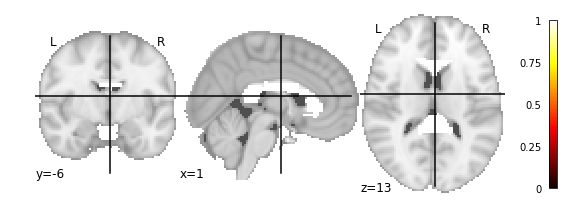

In [25]:
nlp.plot_stat_map(nli.new_img_like(atlas_img, label_map['Corpus Callosum']))

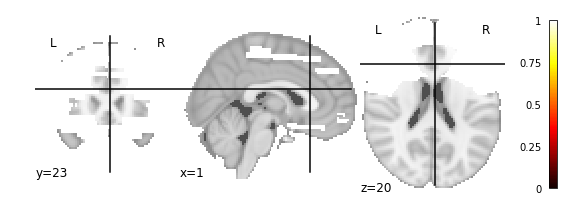

In [29]:
nlp.plot_stat_map(nli.new_img_like(atlas_img, label_map['Frontal Lobe']))

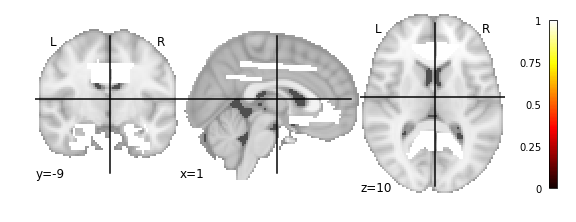

In [30]:
nlp.plot_stat_map(nli.new_img_like(atlas_img, label_map['Limbic Lobe']))